In [223]:
# Importation des librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer

In [224]:
# Importer le dataset
dataset = pd.read_csv('clients.csv')



In [225]:
# Visualisation des données
dataset
#dataset.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [226]:
#Afficher le Dataset
plt.scatter(dataset.EstimatedSalary, dataset.Purchased) 

In [227]:
#Suppression de User ID
dataset.drop(['User ID'],axis='columns',inplace=True)

In [228]:
# encoder = OneHotEncoder()
# data= pd.DataFrame(encoder.fit_transform(dataset[['Gender']]).toarray())
# data.columns = encoder.get_feature_names_out()
# data

In [229]:
# dataset

In [230]:
# df = pd.concat([data,dataset], axis=1)
# # # Transformer la variable Gender
# # dataset.Gender = dataset.Gender.map({'Male': 1, 'Female': 2})
# df.head()

In [231]:
# numfeat = dataset.loc[:,'EstimatedSalary']
# catfeat = dataset.loc[:,'Gender']
# numfeat

In [232]:
# # df.drop(['Gender'],axis='columns',inplace=True)
# cat= make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder())
# num= make_pipeline(SimpleImputer,StandardScaler())

In [233]:
trans = make_column_transformer((StandardScaler(),['EstimatedSalary']),(OneHotEncoder(),['Gender']))

In [234]:
#dataset = pd.DataFrame(trans.fit_transform(dataset))


In [235]:
# Pourcentage d'achat
count_sub = len(dataset[dataset['Purchased']==1])
count_no_sub = len(dataset[dataset['Purchased']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Pourcentage absence d'achat", pct_of_no_sub*100)

Pourcentage absence d'achat 64.25


In [236]:
# # Influence du genre sur l'acte d'achat
# table= pd.crosstab(dataset.Gender,dataset.Purchased)
# table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
# plt.title('Genre / Achat')
# plt.xlabel('Genre')
# plt.ylabel('Pourcentage de client')

In [237]:
# Définir notre variable dépendante y et nos varaibles indépendantes X
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X

,Gender,Age,EstimatedSalary
0,Male,19.0,19000.0
1,Male,35.0,20000.0
2,Female,26.0,43000.0
3,Female,27.0,57000.0
4,Male,19.0,76000.0
...,...,...,...
395,Female,46.0,41000.0
396,Male,51.0,23000.0
397,Female,50.0,20000.0
398,Male,36.0,33000.0


In [238]:
# Visualisation des points
# plt.scatter(X[:,0],X[:,1], c=y)

In [239]:
# Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [240]:
# # Feature Scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [241]:
# # Construction du modèle
# classifier = LogisticRegression(random_state = 0, solver='liblinear')
# classifier.fit(X_train, y_train)

In [242]:
#  param={'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [243]:
# grid = GridSearchCV(LogisticRegression(),param_grid=param,cv=4)

In [244]:
model = make_pipeline(trans,LogisticRegression(random_state = 0, solver='liblinear'))

In [245]:
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [250]:
#X_train

,Gender,Age,EstimatedSalary
250,Female,44.0,39000.0
63,Male,32.0,120000.0
312,Female,38.0,50000.0
159,Female,32.0,135000.0
283,Female,52.0,21000.0
...,...,...,...
323,Female,48.0,30000.0
192,Male,29.0,43000.0
117,Male,36.0,52000.0
47,Female,27.0,54000.0


In [247]:
# Faire de nouvelles prédictions
#y_pred = classifier.predict(X_test)
model.score(X_test,y_test)

0.8

In [248]:
# Matrice de confusion

cm = confusion_matrix(y_test,model.predict(X_test))
print(cm)
#print(classification_report(y_test, y_pred))

[[66  2]
 [18 14]]


<IPython.core.display.Javascript object>


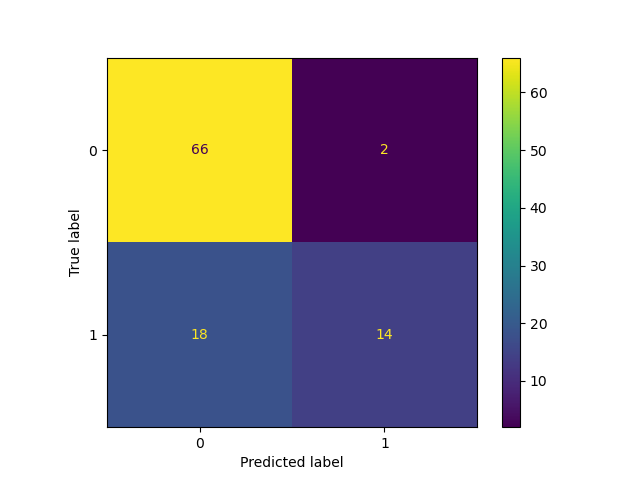

In [201]:
ConfusionMatrixDisplay.from_predictions(y_test,model.predict(X_test))

In [180]:
x_predict = sc.transform([[0.0,1.0,60,100000]])
classifier.predict(x_predict)

array([1], dtype=int64)

In [184]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test)